In [2]:
import torch
import sys

sys.path.append('/data/condor_shared/users/ssued/RNOGCnn')
import utils

device = 'cuda' if torch.cuda.is_available() else 'cpu'

/data/i3home/ssued/venv_ubu22.04/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
from torch import nn
# Let there be light!
    
class RNOG_CNN_alpha_1(nn.Module):

    def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        KERNEL_HEIGHT = 4
        KERNEL_WIDTH = 25
        KERNEL_SIZE = (KERNEL_HEIGHT,KERNEL_WIDTH)

        self.conv_block_1=nn.Sequential(
            nn.Relu(),
            nn.Conv2d(in_channels=input_shape,
                      out_channels=output_shape,
                      kernel_size=KERNEL_SIZE,
                      stride=1),
        )

    def forward(self,x):
        x = self.conv_block_1(x)
        return x

In [4]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save path
MODEL_NAME='RNOG_alpha_model_2.pth'
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

In [8]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = RNOG_CNN_alpha_1(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=1) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH,weights_only=True))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [11]:
import random
from torch.utils.data import DataLoader

eventbatch = utils.obtain_evb('eventbatch.pkl')
# Select 20 random events from eventbatch
random_events = dict(random.choices(list(eventbatch.items()), k=20))

random_data = utils.EventtoData(random_events)

random_dataloader = DataLoader(random_data,1,False)


First 20 predictions (Predicted SNR, True SNR):
Sample 1: Predicted = 3.7482454776763916, True = 3.7041838169097900
MSE: 0.0019414299495110754
Sample 2: Predicted = 3.6220843791961670, True = 3.4774293899536133
MSE: 0.02092506591276333
Sample 3: Predicted = 3.7030787467956543, True = 3.4349284172058105
MSE: 0.07190459925914183
Sample 4: Predicted = 3.5486145019531250, True = 3.2545888423919678
MSE: 0.08645108848037353
Sample 5: Predicted = 3.4251575469970703, True = 3.3963477611541748
MSE: 0.0008300037603135024
Sample 6: Predicted = 3.3234484195709229, True = 3.3746128082275391
MSE: 0.0026177946666052776
Sample 7: Predicted = 3.6449637413024902, True = 3.3737142086029053
MSE: 0.07357630898974321
Sample 8: Predicted = 3.6413021087646484, True = 3.1972081661224365
MSE: 0.1972194298915042
Sample 9: Predicted = 3.5860280990600586, True = 3.8125844001770020
MSE: 0.05132775757579111
Sample 10: Predicted = 3.7926952838897705, True = 3.2664132118225098
MSE: 0.27697281937940943
Sample 11: Predi

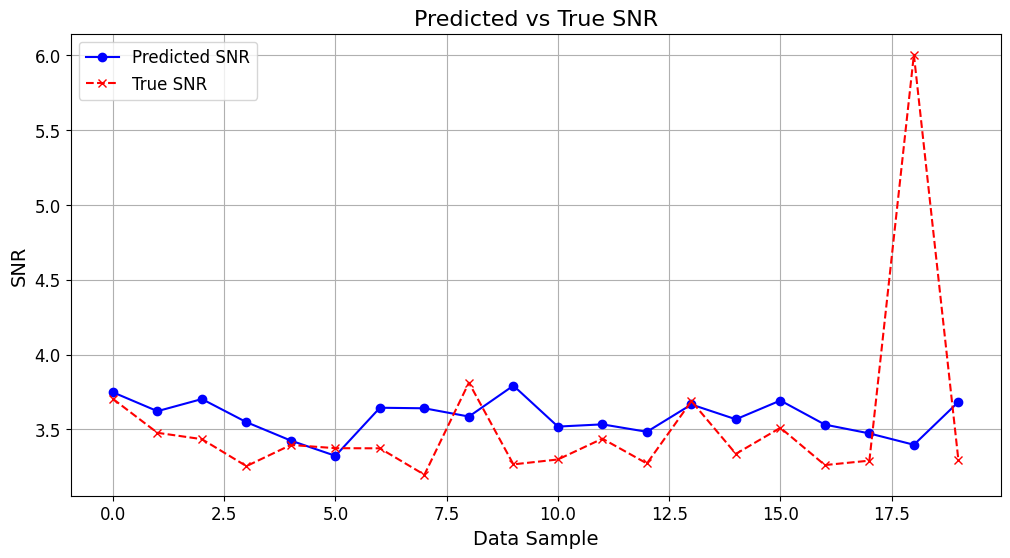

In [12]:
preds = utils.make_predictions(loaded_model_2, random_dataloader, device=device, plot=True,verbose=True)